In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [3]:
data_chess = pd.read_csv('games.csv')

data_chess

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


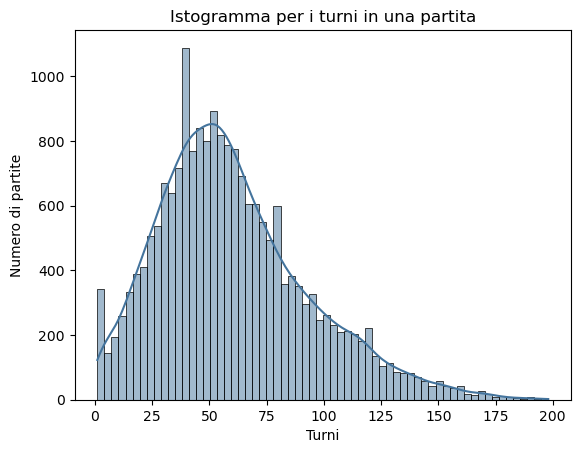

In [141]:
turns=data_chess[data_chess['turns']<200]['turns'] #rimuovo outliers (val >200)
histplot = sns.histplot(turns, kde=True, color='#44749D')

histplot.set_xlabel("Turni")
histplot.set_ylabel("Numero di partite")

histplot.set(title='Istogramma per i turni in una partita')

histplot;

In [1]:
df = data_chess.copy()

df["average_rating"] = (df["white_rating"] + df["black_rating"]) / 2

filtered_data_chess = df[(df["white_rating"] != 1500) & (df["black_rating"] != 1500)]
x = filtered_data_chess["average_rating"]

histplot = sns.histplot(data=df, x=x, kde=True, color='#44749D')

histplot.set_xlabel("Rating")
histplot.set_ylabel("Numero di partite")

histplot.set(title="Istogramma Sul Rating Medio")

histplot;

NameError: name 'data_chess' is not defined

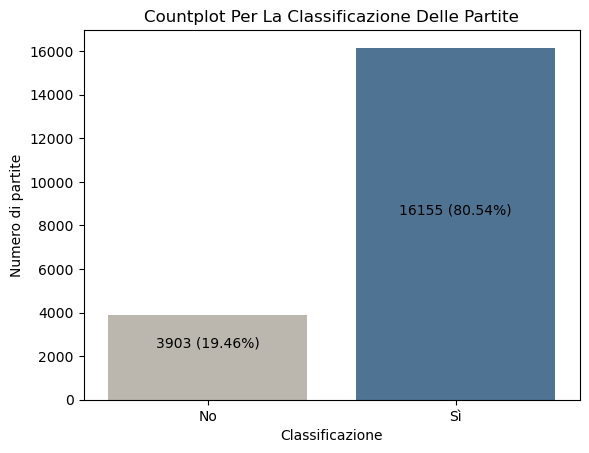

In [139]:
colors = ["#BDB8AD", "#44749D"]
countplot = sns.countplot(x='rated', data=data_chess, palette=colors)

countplot.set_xlabel("Classificazione")
countplot.set_ylabel("Numero di partite")

labels = ["No", "Sì"]
countplot.set_xticklabels(labels)
countplot.set(title='Countplot Per La Classificazione Delle Partite')

total = len(data_chess)
for p in countplot.patches:
    countplot.annotate(f'{p.get_height()} ({p.get_height() / total * 100:.2f}%)',
                       (p.get_x() + p.get_width() / 2., p.get_height()/2),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points'
                      , color='black')
plt.show()

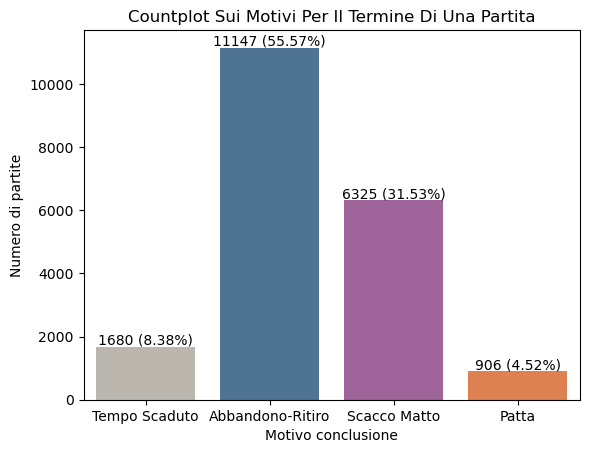

In [76]:
colors = ["#BDB8AD", "#44749D","#A95AA1", "#F5793A"]
countplot = sns.countplot(x="victory_status", data=data_chess, palette=colors)
countplot.set_xlabel("Motivo conclusione")
countplot.set_ylabel("Numero di partite")

labels = ["Tempo Scaduto", "Abbandono-Ritiro", "Scacco Matto", "Patta"]
countplot.set_xticklabels(labels)
countplot.set(title='Countplot Sui Motivi Per Il Termine Di Una Partita');
total = len(data_chess)
for p in countplot.patches:
    countplot.annotate(f'{p.get_height()} ({p.get_height() / total * 100:.2f}%)',
                       (p.get_x() + p.get_width() / 2., p.get_height()-250),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points'
                      , color='black')
plt.show()

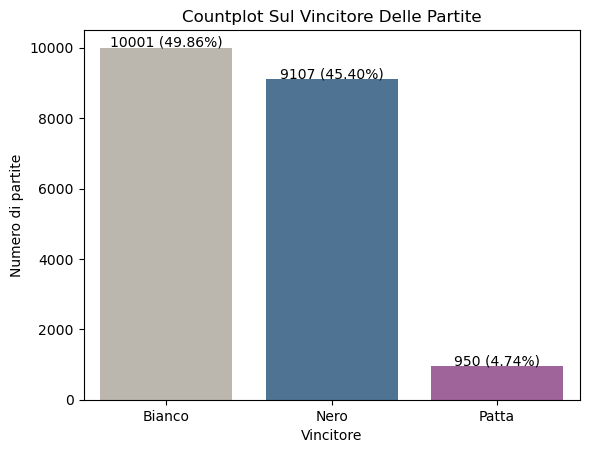

In [79]:
colors = ["#BDB8AD", "#44749D","#A95AA1", "#F5793A"]
countplot = sns.countplot(data=data_chess, x='winner', palette=colors)

countplot.set_xlabel("Vincitore")
countplot.set_ylabel("Numero di partite")

labels = ["Bianco", "Nero", "Patta"]
countplot.set_xticklabels(labels)
countplot.set(title='Countplot Sul Vincitore Delle Partite');
total = len(data_chess)
for p in countplot.patches:
    countplot.annotate(f'{p.get_height()} ({p.get_height() / total * 100:.2f}%)',
                       (p.get_x() + p.get_width() / 2., p.get_height()-250),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points'
                      , color='black')
plt.show()

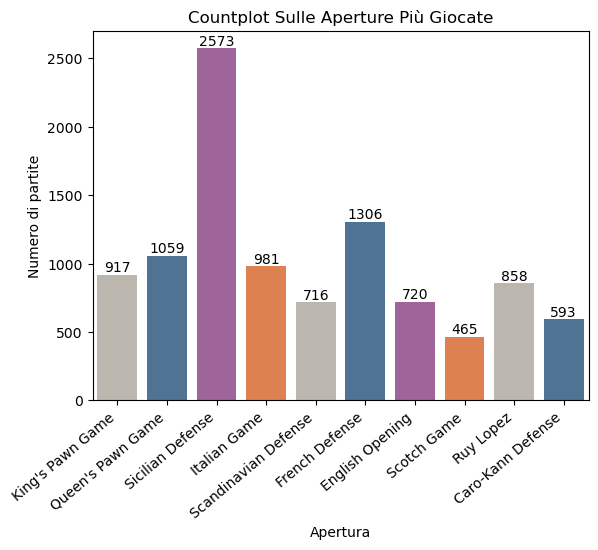

In [81]:
df = data_chess.copy()

df[["opening", "variation"]] = df["opening_name"].str.split(":", n=1, expand=True)


top_openings = df['opening'].value_counts().head(10).index
df = df[df['opening'].isin(top_openings)]

colors = ["#BDB8AD", "#44749D","#A95AA1", "#F5793A"]
countplot = sns.countplot(data=df, x='opening', palette=colors)
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=40, ha="right")

countplot.set_xlabel("Apertura")
countplot.set_ylabel("Numero di partite")
countplot.set(title='Countplot Sulle Aperture Più Giocate')
countplot.bar_label(countplot.containers[0])
plt.show()

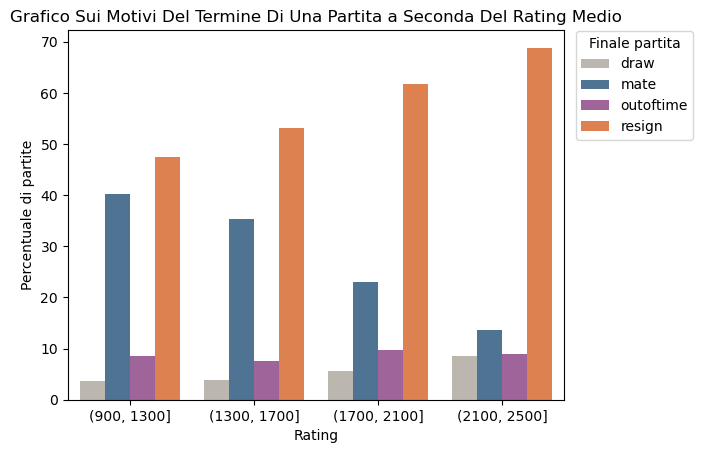

In [4]:
df = data_chess.copy()

df['average_rating_range'] = pd.cut(df[['white_rating', 'black_rating']].mean(axis=1), bins=range(900, 2501, 400))

percentages = df.groupby(['average_rating_range', 'victory_status']).size() / df.groupby(['average_rating_range']).size()

colors = ["#BDB8AD", "#44749D","#A95AA1", "#F5793A"]
barplot = sns.barplot(x='average_rating_range', y=percentages.values*100, hue='victory_status', palette=colors, data=percentages.reset_index())
barplot.set(title='Grafico Sui Motivi Del Termine Di Una Partita a Seconda Del Rating Medio')
barplot.set_xlabel("Rating")
barplot.set_ylabel("Percentuale di partite")

barplot.legend(title="Motivo per il termine della partita");
barplot.legend(title="Finale partita", bbox_to_anchor=(1.01, 1.017), loc='upper left')
barplot;

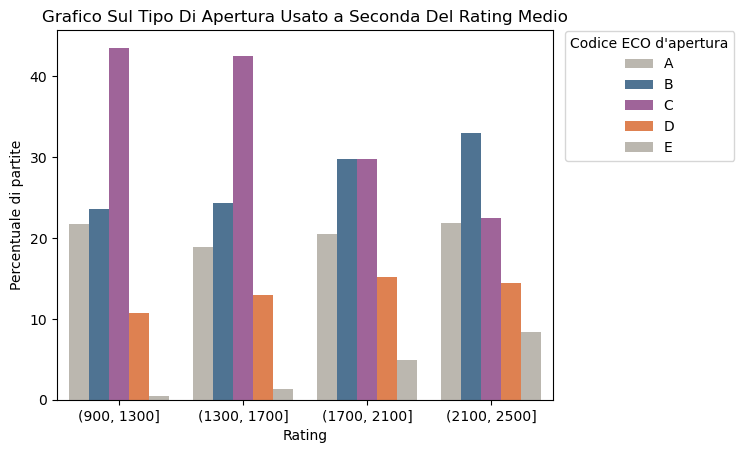

In [137]:
df = data_chess.copy()

df[['opening_eco_letter', 'opening_eco_num']] = df['opening_eco'].str.extract(r'([A-Z])(\d\d)')
df['opening_eco_num'] = df['opening_eco_num'].astype(int)
df['average_rating_range'] = pd.cut(df[['white_rating', 'black_rating']].mean(axis=1), bins=range(900, 2501, 400))

percentages = df.groupby(['average_rating_range', 'opening_eco_letter']).size() / df.groupby(['average_rating_range']).size()

colors = ["#BDB8AD", "#44749D","#A95AA1", "#F5793A"]
barplot = sns.barplot(x='average_rating_range', y=percentages.values*100, palette=colors, hue='opening_eco_letter', data=percentages.reset_index())

barplot.set(title='Grafico Sul Tipo Di Apertura Usato a Seconda Del Rating Medio')
barplot.set_xlabel("Rating")
barplot.set_ylabel("Percentuale di partite")

barplot.legend(title="Codice ECO d'apertura", bbox_to_anchor=(1.01, 1.017), loc='upper left')
barplot;

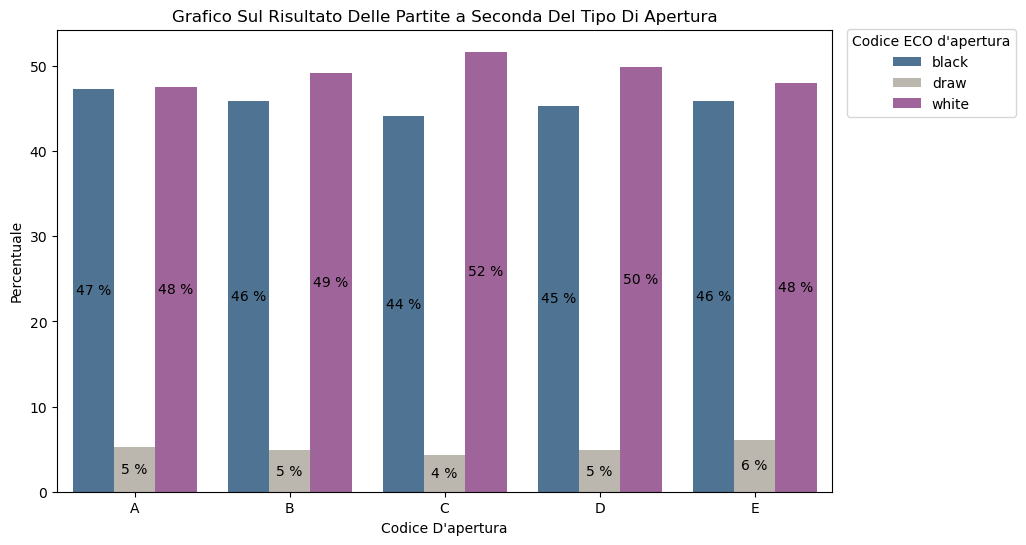

In [138]:
df = data_chess.copy()

df[['opening_eco_letter', 'opening_eco_num']] = df['opening_eco'].str.extract(r'([A-Z])(\d\d)')
df['opening_eco_num'] = df['opening_eco_num'].astype(int)
df_percent = df.groupby(['opening_eco_letter', 'winner'], group_keys=False).size().groupby(level=0, group_keys=False).apply(lambda x: 100 * x / x.sum()).reset_index().rename(columns={0:'percent'})

plt.figure(figsize=(10,6))
colors = ["#44749D","#BDB8AD","#A95AA1", "#F5793A"]
barplot = sns.barplot(x='opening_eco_letter', y='percent', hue='winner',palette=colors, data=df_percent)
plt.title('Grafico Sul Risultato Delle Partite a Seconda Del Tipo Di Apertura')
plt.ylabel('Percentuale')
plt.xlabel("Codice D'apertura")
barplot.legend(title="Vincitore")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    barplot.text(x+width/2,
            y+height/2,
            '{:.0f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

barplot=barplot.legend(title="Codice ECO d'apertura", bbox_to_anchor=(1.01, 1.017), loc='upper left')

plt.show()

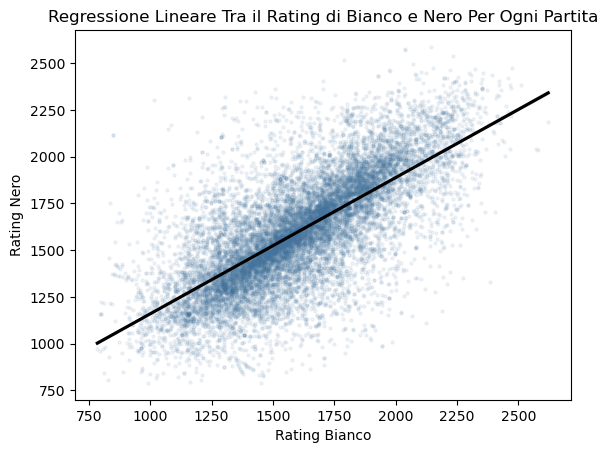

In [90]:
df = data_chess.copy()

filtered_data_chess = df[(data_chess["white_rating"] != 1500) & (df["black_rating"] != 1500) & (df['rated']==True)]

x = filtered_data_chess["white_rating"]
y = filtered_data_chess["black_rating"]
regplot = sns.regplot(x=x, y=y, line_kws={"color": "black"}, scatter_kws={"s": 5, "alpha": 0.08, "color": "#44749D"})
regplot.set(title='Regressione Lineare Tra il Rating di Bianco e Nero Per Ogni Partita')
regplot.set_xlabel("Rating Bianco")
regplot.set_ylabel("Rating Nero")
regplot;

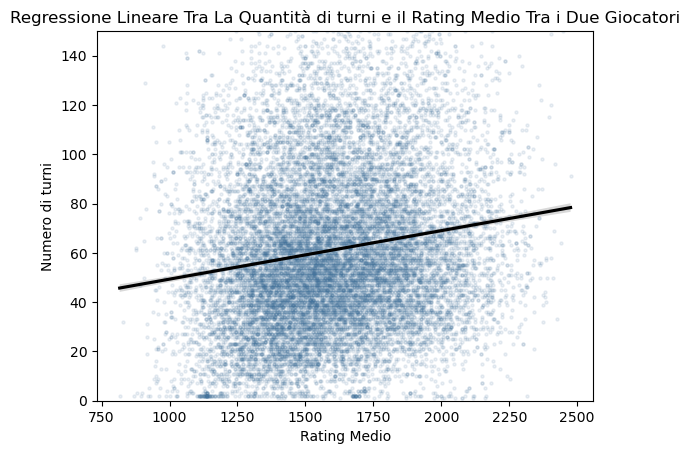

In [101]:
df = data_chess.copy()

df["average_rating"] = (df["white_rating"] + df["black_rating"]) / 2

filtered_data_chess = df[(df["white_rating"] != 1500) & (df["black_rating"] != 1500)]
x = filtered_data_chess["average_rating"]
y = filtered_data_chess["turns"]
regplot = sns.regplot(x=x, y=y, line_kws={"color": "black"}, scatter_kws={"s": 5, "alpha": 0.1, "color": "#44749D"})

regplot.set(ylim=(0, 150))
regplot.set(title='Regressione Lineare Tra La Quantità di turni e il Rating Medio Tra i Due Giocatori')
regplot.set_xlabel("Rating Medio")
regplot.set_ylabel("Numero di turni")

regplot;

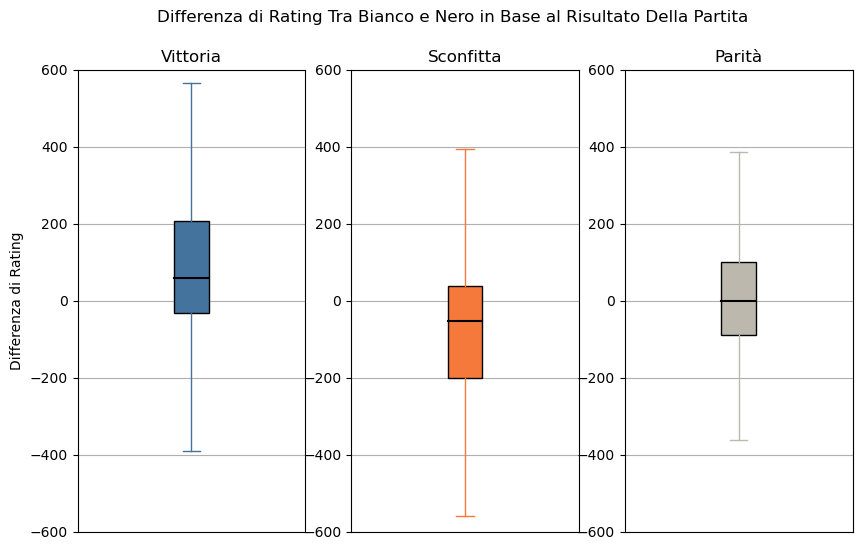

In [100]:
df = data_chess.copy()

df['rating_difference'] = df['white_rating'] - df['black_rating']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
df[df['winner'] == 'white'].boxplot(column='rating_difference', ax=axes[0], showfliers=False,patch_artist = True,
           boxprops = dict(facecolor = "#44749D"),medianprops = dict(color = "black", linewidth = 1.5), color="#44749D")
axes[0].set_title('Vittoria')
axes[0].set_ylim(-600,600)
axes[0].set_xticks([])
axes[0].set_ylabel("Differenza di Rating")

df[df['winner'] == 'black'].boxplot(column='rating_difference', ax=axes[1], showfliers=False,patch_artist = True,
           boxprops = dict(facecolor = "#F5793A"),medianprops = dict(color = "black", linewidth = 1.5), color="#F5793A")
axes[1].set_title('Sconfitta')
axes[1].set_ylim(-600,600)
axes[1].set_xticks([])

df[df['winner'] == 'draw'].boxplot(column='rating_difference', ax=axes[2], showfliers=False,patch_artist = True,
           boxprops = dict(facecolor = "#BDB8AD"),medianprops = dict(color = "black", linewidth = 1.5), color="#BDB8AD")
axes[2].set_title('Parità')
axes[2].set_ylim(-600,600)
axes[2].set_xticks([])

fig.suptitle('Differenza di Rating Tra Bianco e Nero in Base al Risultato Della Partita')
plt.show()